# Un nuevo premier: Walter Martos. ¿Qué dijo?

By David Sánchez (11/08/2020)

<p style="text-align:justify;">
    Un nuevo primer ministro ha juramentado: Walter Martos. Aprovecharemos su discurso para realizar un ejercicio de wordcloud con <b>Python 3</b>. Al final tendremos algo así:
</p>

<p style="text-align:center;"><img src="./images/wordcloud.png" alt="Logo2" alt="centered image" width="400" height="300"></p>

### Paso 1: Instalaciones y discurso

<p style="text-align:justify;">Necesitamos un archivo de texto con el discurso que Walter Martos dio en el congreso. Se encuentra en internet, pero también en este repositorio.</p>

**1.1. Instalaciones**

Ejecutar la instalación de paquetes por utilizar en este notebook mendiante el siguiente comando.
```bash
pip3 install -r ./requirements.txt
```
Se recomienda usar el gestor de ambientes `conda`.

In [1]:
# requirements
# --------------------------------------------------
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator
# settings
# --------------------------------------------------
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RODRIGO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1.2. Discurso de Walter Martos en el congreso**

In [2]:
with open('./resources/472121674WalterMartos.txt', 'r') as f:
    speech_text = '\n'.join(f.readlines())

### Paso 2: Stopwords y puntuación

<p style="text-align:justify;">Los textos están cargados de palabras poco importantes para el wordcloud, como las preprosiciones, artículos y adverbios. Asimismo, pueden existir adjetivos, verbos o sustantivos que tampoco nos informan mucho. Si no filtramos estas palabras, por ejemplo, tendríamos algo como lo siguiente:</p>

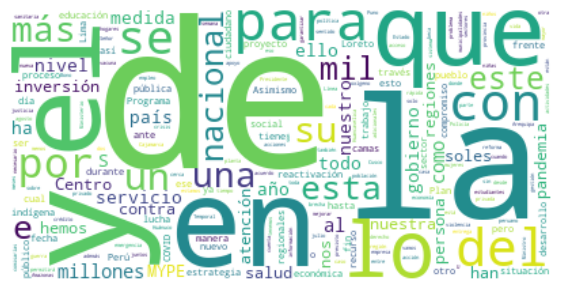

In [3]:
wordcloud = WordCloud(background_color='white', collocations=False).generate(speech_text)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<p style="text-align:justify;">Para corregir esto debemos indicar "stopwords": palabras de uso común al hablar que no tomaremos en cuenta; así como otras palabras que consideremos poco relevantes y de alta frecuencia en el texto.</p>

**2.1. ¿Qué palabras no quiero ver?**

<p style="text-align:justify;">Podemos usar el paquete "nltk" que nos brinda los stopwords comunes en nuestro idioma (español). Sin embargo, ello no comtempla los adjetivos, verbos o sustantivos no relevantes; estas las tendremos que definir manualmente. Tenemos que hacer una combinación de lo automático y manual.</p>

**2.1.1.**  
<p style="text-align:justify;">Sin embargo, lo anterior es engorroso; estar definiendo una por una cada palabra... Podemos utilizar la lista de stopwords en español que brinda el paquete "nltk", y complementar con las palabras adicionales (adjetivos, verbos, sustantivos) que nosotros veamos que no brindan información importante.

In [4]:
stop_words = stopwords.words('spanish')

print(len(stop_words))

313


**2.1.2.**  
<p style="text-align:justify;">Podemos definir manualmente todas las palabras que no queremos ver en la nube: creamos una lista de todas esas palabras y luego adjuntamos cada elemento a la lista anterior:

In [5]:
other_sw = [
    'través','situación','hoy','fecha','manera','caso','nivel','dia','ésta',
    'asimísmo','ano','asi','julio','ser','línea','nuevo','mismo','asímismo',
    'soles','asimismo','fin','así','año','nueva','vamos','frente','cómo',
    'regionales','día','persona','dé','traves','asímísmo','ello','además'
]

In [6]:
stop_words.extend(other_sw)
stop_words = list(set(stop_words))

print(len(stop_words))

348


**2.2. Puntos y comas**

<p style="text-align:justify;">Un tema adicional en los textos es la puntuación y las mayúsculas. "Hola" y "Hola." no son iguales; "Hola" y "hola", tampoco. El texto está lleno de puntuación, para limpiarlo debemos utilizar regex; para resolver las mayúsculas, solo aplicamos un built-in method de los strings de Python. Adicionalmente, en el proceso también resolveremos los saltos de línea.

In [7]:
words_raw = nltk.RegexpTokenizer(r'\w+').tokenize(speech_text)
text_cleaned = ' '.join([str(e) for e in [t.lower().strip() for t in words_raw]])

print('Primeras palabras del discurso:\n', text_cleaned.split()[:10])

Primeras palabras del discurso:
 ['momento', 'de', 'unión', 'y', 'consenso', 'exposición', 'del', 'presidente', 'del', 'consejo']


Es importante notar que en este punto el archivo de texto está siendo tratado como un string (cadena de caracteres).

In [8]:
print('Largo del string:', len(text_cleaned))

Largo del string: 68479


**2.3. Filtrando palabras**

Con el texto libre de puntuación y mayúsculas, ahora debemos filtrar las stopwords que definimos anteriormente:

In [9]:
words_wordcloud = sorted([w for w in text_cleaned.split() if w not in stop_words])
text_wordcloud = ' '.join([str(e) for e in words_wordcloud])

print('Muestra de palabras sin stopwords:\n', text_wordcloud.split()[-10:])

Muestra de palabras sin stopwords:
 ['última', 'último', 'último', 'último', 'último', 'últimos', 'últimos', 'único', 'único', 'útiles']


### Paso 3: Tipo de letra

<p style="text-align:justify;">
    Queremos hacer una nube más personalizada, así que es importante definir un tipo de letra que nos agrade. En el repositorio se encuentra el archivo para la fuente "DINPro-Medium" que usaremos en el ejercicio.
    </p>

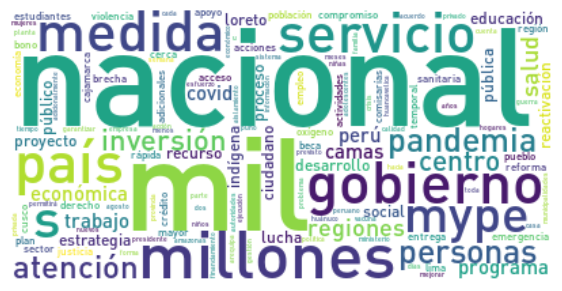

In [10]:
font_path = './resources/DINPro-Medium_13936.ttf'
wordcloud = WordCloud(background_color='white', collocations=False, font_path=font_path).generate(text_wordcloud)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Paso 4: Plantilla y colores

<p style="text-align:justify;">El siguiente paso es tomar una imagen con colores fuertes y usarla como plantilla. Es decir, que los colores de una imagen y su forma se transfieren a la nube de palabras.

**4.1. Parrot Mask**

<p style="text-align:justify;">
    Usaré una foto recortada de un loro del repositorio de <a href="https://github.com/amueller/word_cloud/blob/master/examples/parrot-by-jose-mari-gimenez2.jpg">Andreas Mueller</a>. Esta imagen tiene un alto nivel de saturación, lo cual es necesario para que salga bien la nube.
    </p>

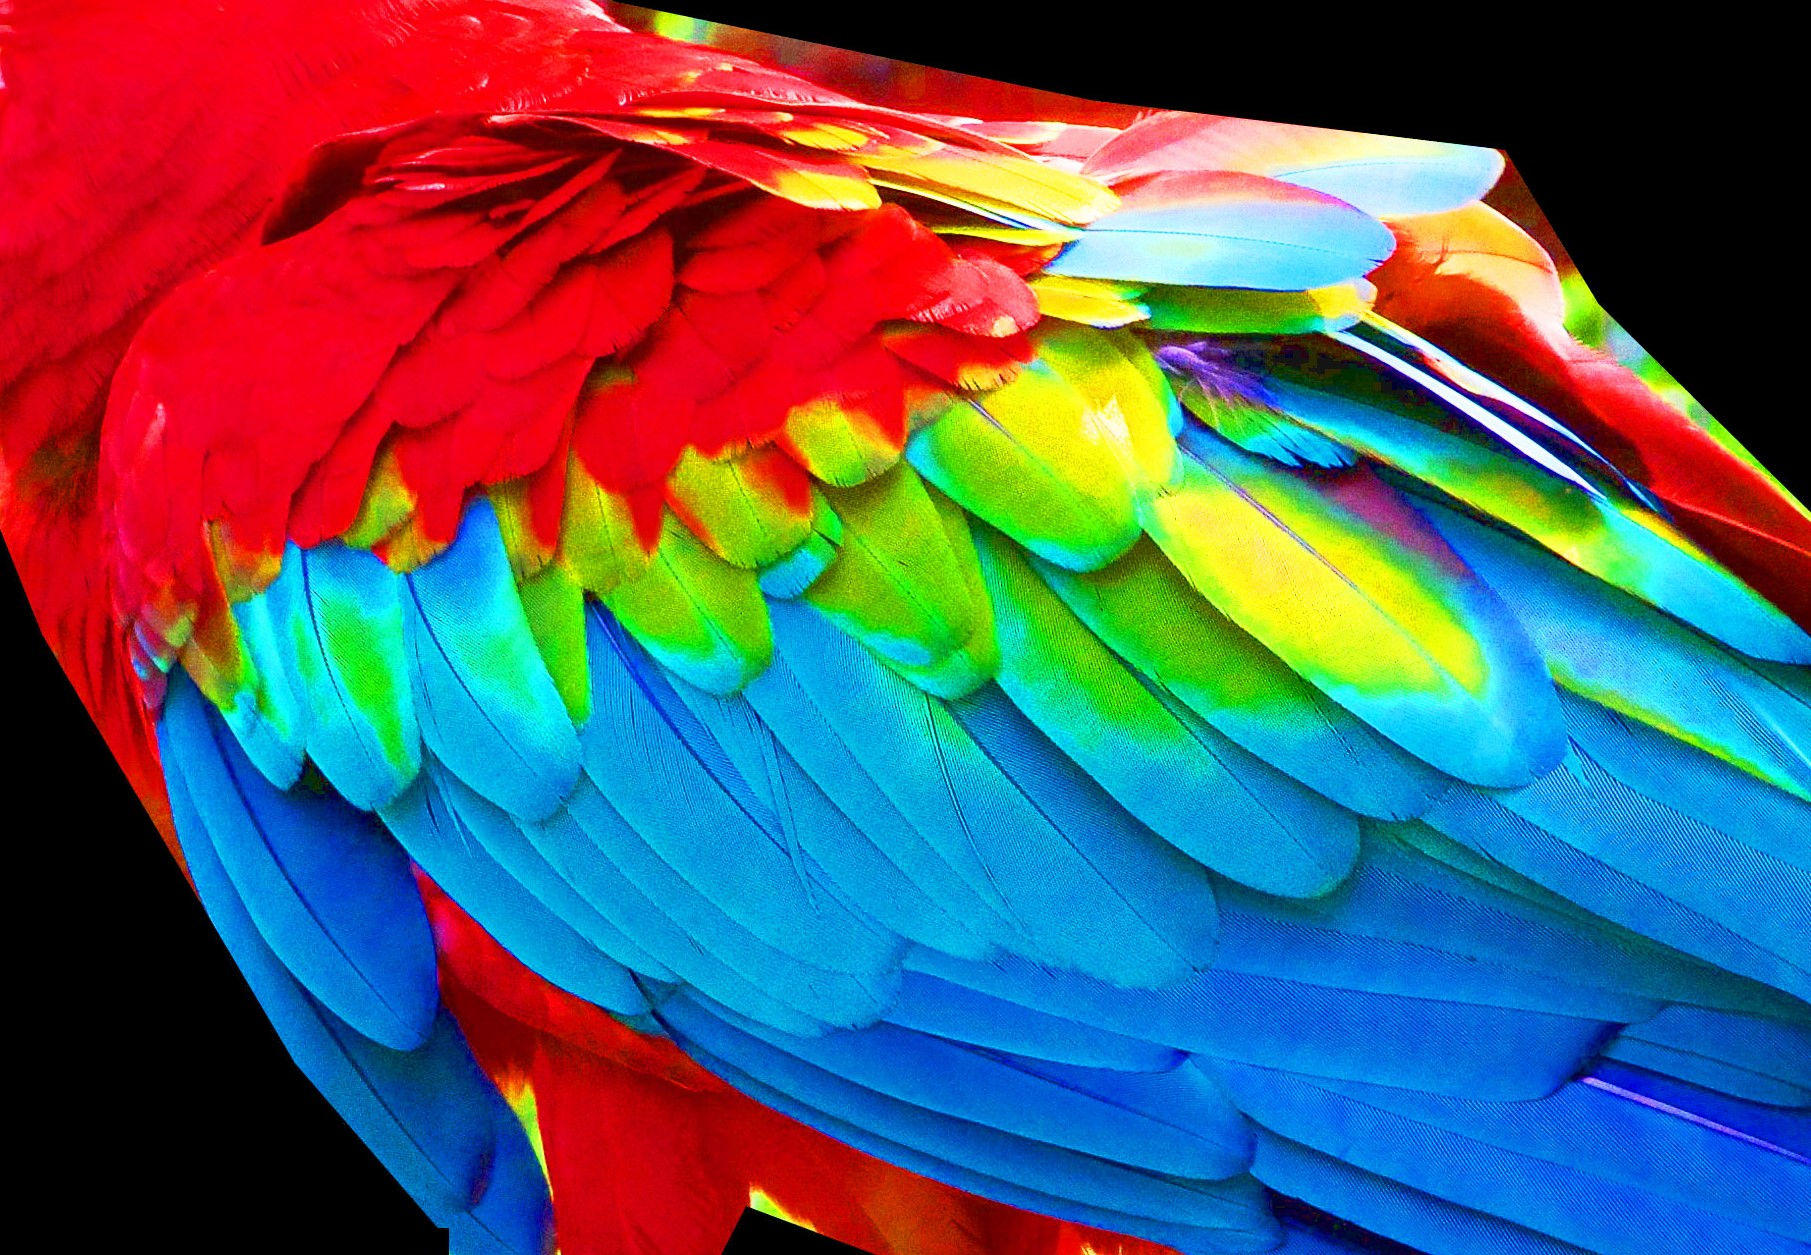

In [11]:
parrot_path = './images/parrot.jpg'
parrot_img = Image.open(parrot_path)
parrot_img

En el siguiente bloque, el objeto `wordcloud_mask` representará la forma de la imagen mediante matrices.

In [12]:
image_array = np.array(parrot_img)[::2, ::2]

wordcloud_mask = image_array.copy()
wordcloud_mask[image_array.sum(axis=2)==0] = 255

edges = np.mean([gaussian_gradient_magnitude(image_array[:, :, i] / 255., 2) for i in range(3)], axis=0)
wordcloud_mask[edges > .08] = 255

**4.2. Colores de la imagen**

La clase `ImageColorGenerator` permite recuperar los colores a partir de la imagen anterior.

In [13]:
image_colors = ImageColorGenerator(image_array)

### Paso 5: Wordcloud

Finalmente, creamos un objeto WordCloud añadiendo entre sus parámetros los detalles anteriores:

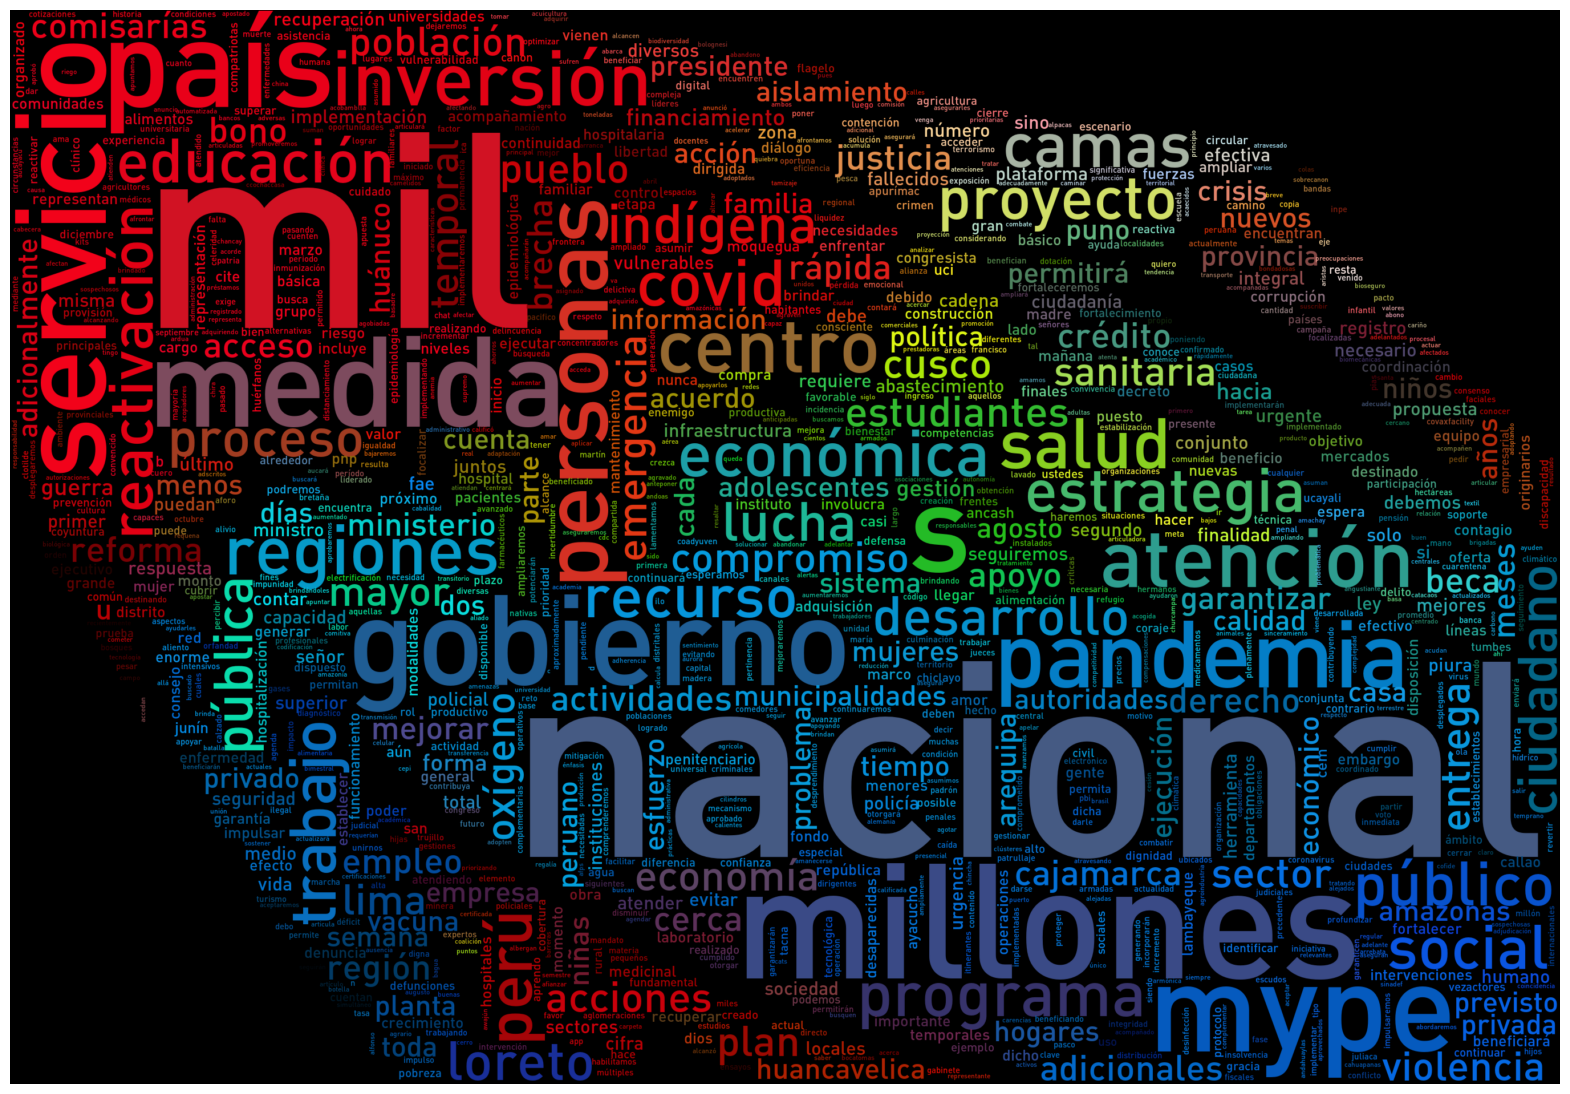

In [14]:
wc = WordCloud(
    font_path=font_path,
    mask=wordcloud_mask,
    width=1800,
    height=900,
    max_words=5000,
    collocations=False,
    scale=3,
    random_state=42, # Seed para replicar
    background_color='black', # Para fondo transparente: "rgba(255, 255, 255, 0)"
    mode='RGBA',
    relative_scaling=0
)
wc.generate(text_wordcloud)

wc.recolor(color_func=image_colors)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

Creo que quedan detalles por pulir respecto a los stopwords, pero ya tenemos el wordcloud.

**Créditos**  
Idea para el diseño y una parte del código fueron recuperados de [amueller](https://github.com/amueller/word_cloud).